# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
import os
import tarfile
import urllib
DATASET_PATH  = os.path.join("datasets", "heartdisease")
def load_heart_data(heart_path):
        csv_path = os.path.join(heart_path, "heartdisease.csv")
        return pd.read_csv(csv_path)
hd = load_heart_data(DATASET_PATH)

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [5]:
hd.head()
hd.info()
hd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

[Use this area to describe any fields you believe will be problemmatic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

Most of the columns we have are ints, which is great. 'sick' is a boolean, but we can probably treat 0 as not sick and 1 as sick, since these numbers are already encoded into booleans. As well, oldpeak is a float, so we may want to round and convert to an integer value, so we are only working with ints.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [6]:
hd.isnull().values.any()

False

The isnull().values.any() functions will print True if any values in the dataframe are NULL, and false otherwise. The output was false, so we have no NULL values to deal with in the dataset.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [7]:
hd = hd.astype({'sick': 'int64'})
hd.info()
hd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

<ipython-input-8-bda923692311>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hd.hist(ax = size.gca())


Saving figure field_histograms


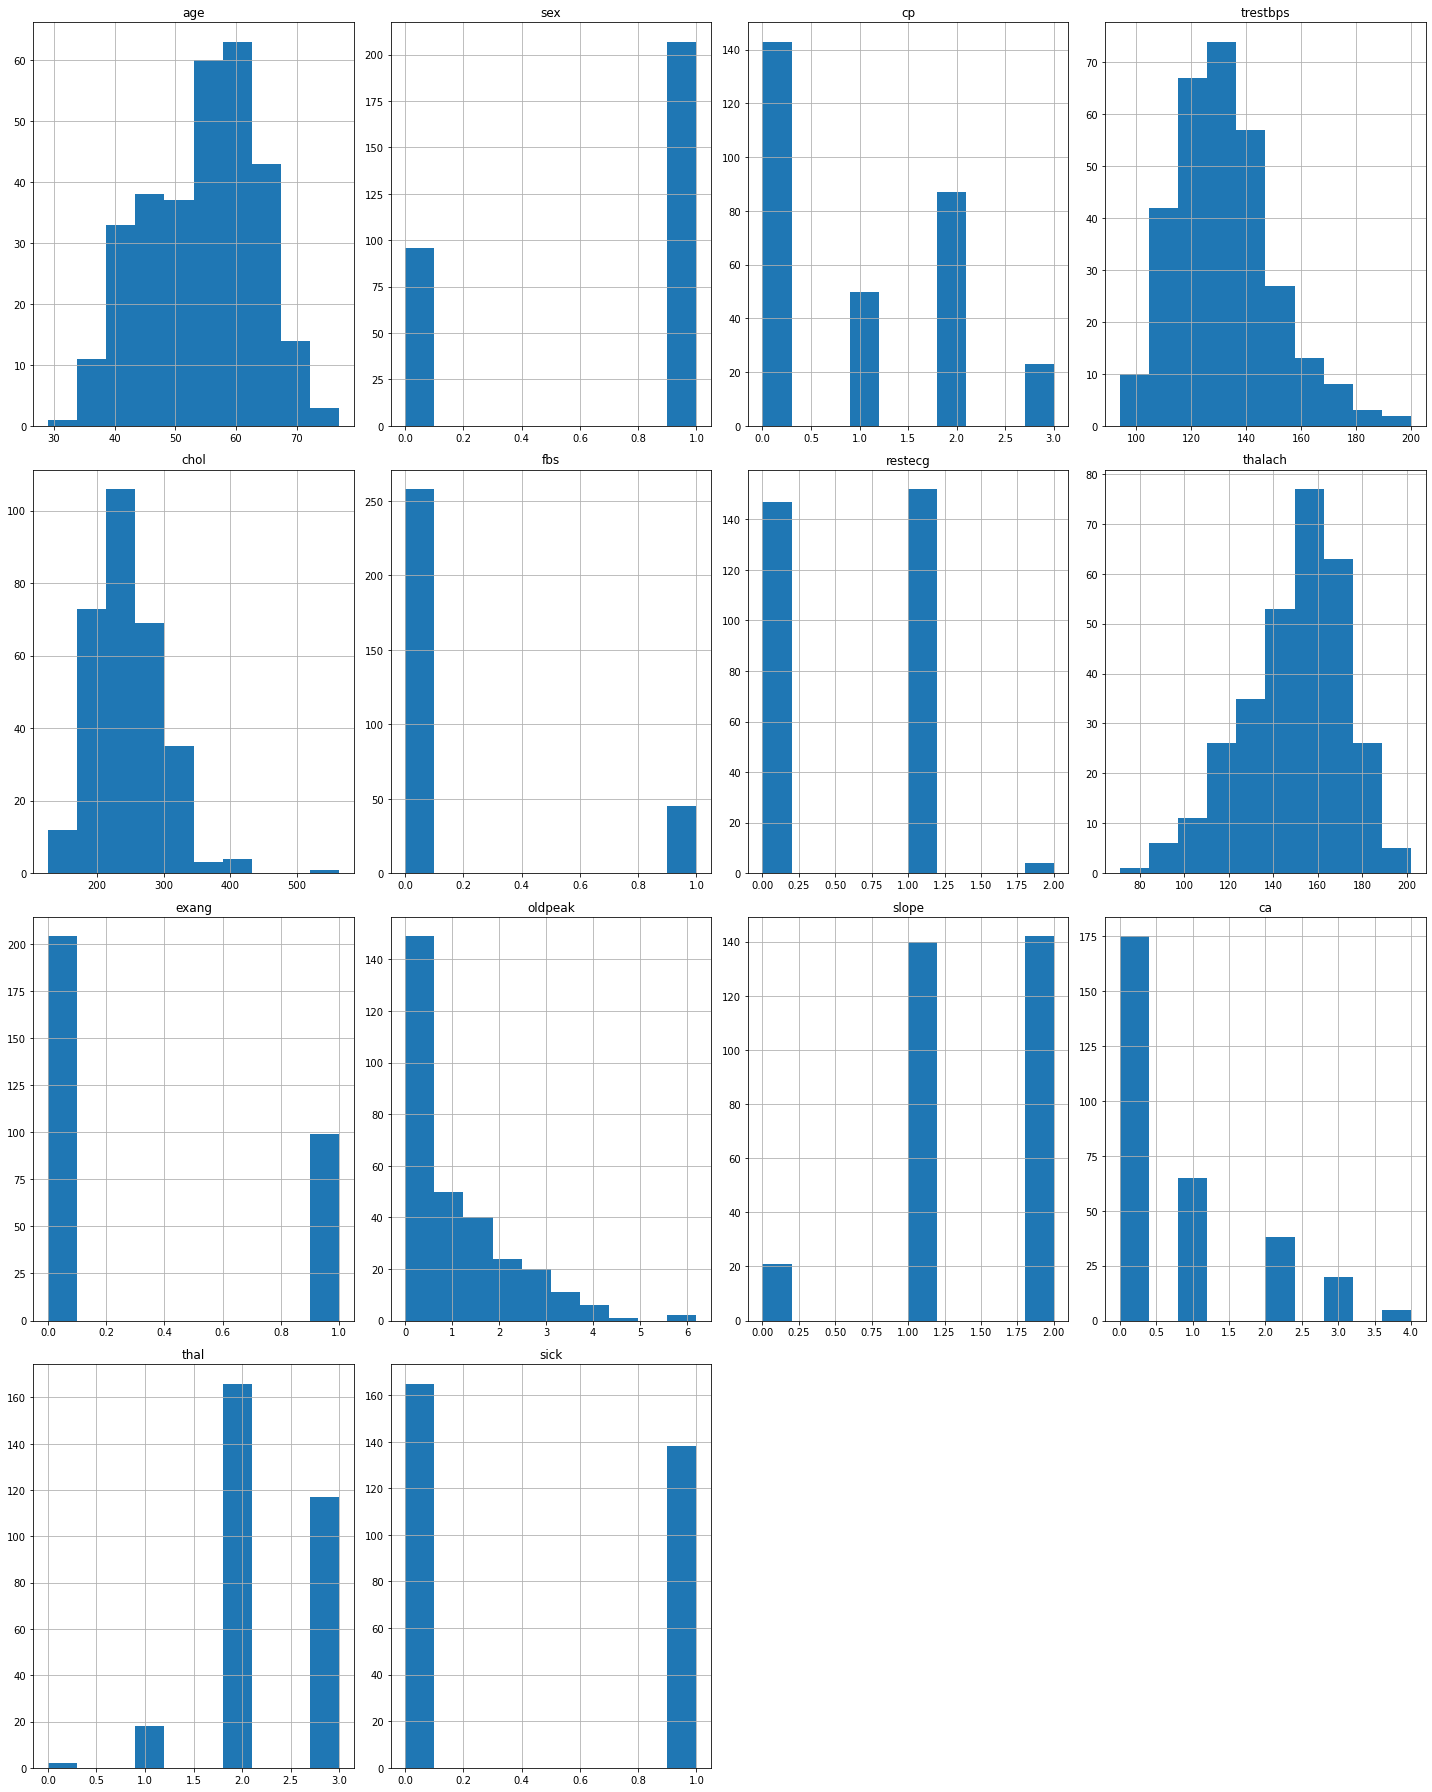

In [8]:
size = plt.figure(figsize= (20,25))
hd.hist(ax = size.gca())
save_fig("field_histograms")

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

Saving figure sick_histogram


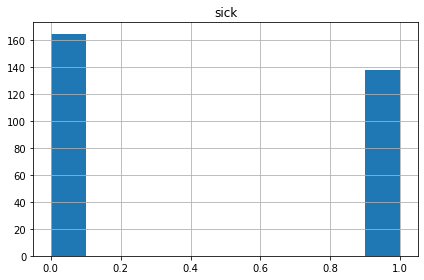

In [9]:
hd.hist(column="sick")
hd['sick'].value_counts()
save_fig("sick_histogram")

It seems we have a bit more people who are not sick (165) than sick (138). This seems to be relatively balanced, so not something we have to worry about.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

If we are artificially balancing a dataset, we might actually be biasing our results/models to be more balanced than the actual data is. There is a reason we have more sick people than non sick people for example. We wouldn't want to make them exactly equal, because that doesn't reflect reality very well. 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

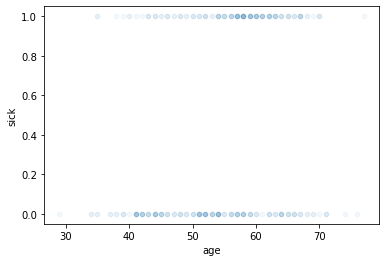

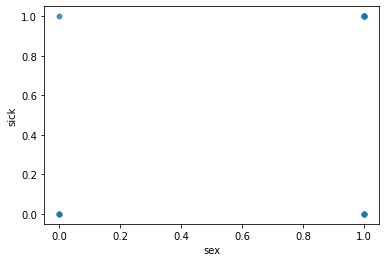

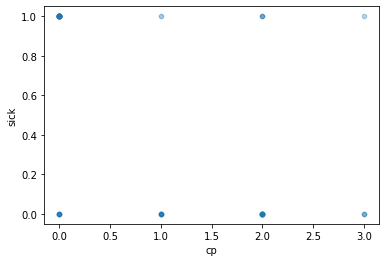

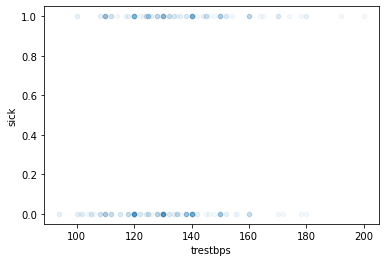

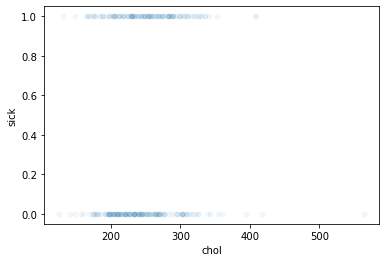

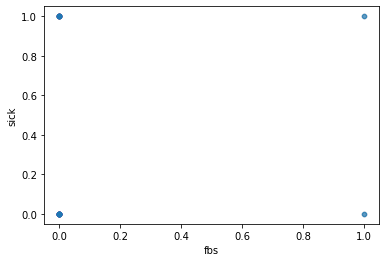

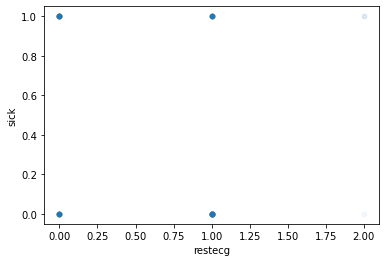

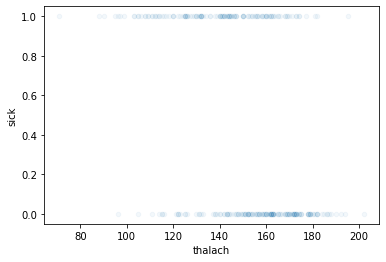

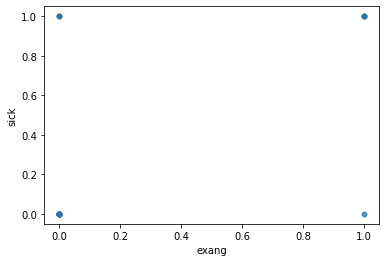

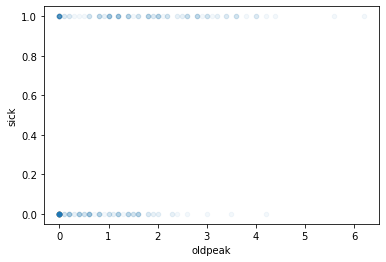

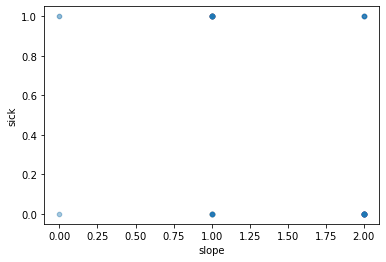

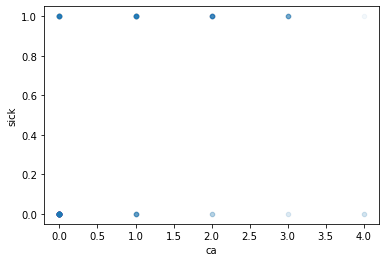

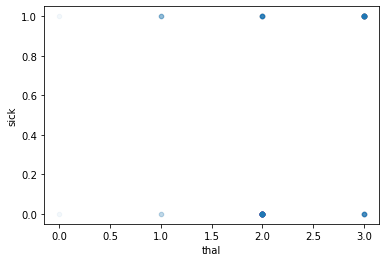

In [10]:
from pandas.plotting import scatter_matrix
corr_matrix = hd.corr()
corr_matrix["sick"].sort_values(ascending=False)
#scatter_matrix(hd, figsize=(20,20))
attr = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
        "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

for j in attr:
    hd.plot(kind="scatter", x=j, y="sick", alpha=0.05)

Some variables correlate more highly than others because they have a greater impact on heart disease. For example, we see that high thalach will indicate that the user does not have heart disease. This makes sense, as the heart that reaches the higher peak heartrate is likely in greater condition than the wearier more damaged hearts. We also see that the number of blood vessels colored increases when the user is sick. This would also intuitively make sense, since more vessels blocking the heart would indicate worse heart health. exang being highly correlated to heart disease also makes a lot of sense. If the user has a bad heart, they would be more likely to experience pain when exercising than a person with a healthier heart.

## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [11]:
y = hd['sick']
x = hd.drop(columns = ['sick'])
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [12]:
itrain, itest = train_test_split(range(hd.shape[0]), train_size=0.8)
X_train = x.loc[itrain]
X_test = x.loc[itest]
y_train = hd['sick'][itrain]
y_test = hd['sick'][itest]

hd.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((303, 14), (242, 13), (242,), (61, 13), (61,))

### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)

knn15 = KNeighborsClassifier(15)
knn15.fit(X_train, y_train)

knn25 = KNeighborsClassifier(25)
knn25.fit(X_train, y_train)

knn75 = KNeighborsClassifier(75)
knn75.fit(X_train, y_train)

print("Classification accuracy for knn1 were: \n Train =",
    knn1.score(X_train,y_train),", Test =", knn1.score(X_test,y_test))
print("Classification accuracy for knn15 were: \n Train =",
    knn15.score(X_train,y_train),", Test =", knn15.score(X_test,y_test))
print("Classification accuracy for knn25 were: \n Train =",
    knn25.score(X_train,y_train),", Test =", knn25.score(X_test,y_test))
print("Classification accuracy for knn75 were: \n Train =",
    knn75.score(X_train,y_train),", Test =", knn75.score(X_test,y_test))


Classification accuracy for knn1 were: 
 Train = 1.0 , Test = 0.5081967213114754
Classification accuracy for knn15 were: 
 Train = 0.7107438016528925 , Test = 0.6721311475409836
Classification accuracy for knn25 were: 
 Train = 0.7148760330578512 , Test = 0.6885245901639344
Classification accuracy for knn75 were: 
 Train = 0.6322314049586777 , Test = 0.6721311475409836


It seems that KNN performs alright at predicting the data, for k values around 25. The model is medium accuracy, with R^2 values hovering around 0.6 to 0.7. This is decent, but we should be able to perform better with a better model. 

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import LabelEncoder

heart_num = hd.drop(columns = ['sick'])

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

heart_num_tr = num_pipeline.fit_transform(heart_num)
numerical_features = list(heart_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
    ])

heart_scaled = full_pipeline.fit_transform(heart_num)
heart_scaled




array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [15]:
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(heart_scaled, y, test_size=0.2)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)

knn15 = KNeighborsClassifier(15)
knn15.fit(X_train, y_train)

knn25 = KNeighborsClassifier(25)
knn25.fit(X_train, y_train)

knn75 = KNeighborsClassifier(75)
knn75.fit(X_train, y_train)

print("Classification accuracy for knn1 were: \n Train =",
    knn1.score(X_train,y_train),", Test =", knn1.score(X_test,y_test))
print("Classification accuracy for knn15 were: \n Train =",
    knn15.score(X_train,y_train),", Test =", knn15.score(X_test,y_test))
print("Classification accuracy for knn25 were: \n Train =",
    knn25.score(X_train,y_train),", Test =", knn25.score(X_test,y_test))
print("Classification accuracy for knn75 were: \n Train =",
    knn75.score(X_train,y_train),", Test =", knn75.score(X_test,y_test))


(242, 13) (242,) (61, 13) (61,)
Classification accuracy for knn1 were: 
 Train = 1.0 , Test = 0.7540983606557377
Classification accuracy for knn15 were: 
 Train = 0.8388429752066116 , Test = 0.8360655737704918
Classification accuracy for knn25 were: 
 Train = 0.8305785123966942 , Test = 0.819672131147541
Classification accuracy for knn75 were: 
 Train = 0.7975206611570248 , Test = 0.7868852459016393


These results were much more promising after pipelining the data. Originally, our R^2 values were hovering in the 0.6-0.7 range. Now, they are in the 0.7-0.9 range, indicating our algorithm is much better at predicting heart disease sickness.
The implications here are that pipelining is absolutely crucial when creating a kNN model and ensuring its accuracy. 

### Parameter Optimization.  As we saw in HW1, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [16]:
k_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]

for i in k_values:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    print("Classification accuracy for knn",{i}," were: \n Train =",
          knn.score(X_train, y_train),", Test =", knn.score(X_test,y_test))

    

Classification accuracy for knn {1}  were: 
 Train = 1.0 , Test = 0.7540983606557377
Classification accuracy for knn {2}  were: 
 Train = 0.8760330578512396 , Test = 0.7704918032786885
Classification accuracy for knn {3}  were: 
 Train = 0.9090909090909091 , Test = 0.8360655737704918
Classification accuracy for knn {5}  were: 
 Train = 0.8842975206611571 , Test = 0.8032786885245902
Classification accuracy for knn {7}  were: 
 Train = 0.871900826446281 , Test = 0.8524590163934426
Classification accuracy for knn {9}  were: 
 Train = 0.871900826446281 , Test = 0.8524590163934426
Classification accuracy for knn {10}  were: 
 Train = 0.8429752066115702 , Test = 0.8360655737704918
Classification accuracy for knn {20}  were: 
 Train = 0.8264462809917356 , Test = 0.8032786885245902
Classification accuracy for knn {50}  were: 
 Train = 0.8181818181818182 , Test = 0.819672131147541


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. Report on the same four metrics as the SVM and graph the resulting ROC curve.

our initial logistic regression model yielded accuracy score of: 0.8688524590163934
our logistic regression model yielded precision score of:  0.9354838709677419
our logistic regression model yielded F1 score of:  0.8787878787878788
our logistic regression model yielded recall score of:  0.8285714285714286


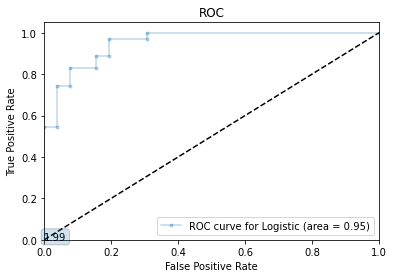

In [17]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logit = sk.linear_model.LogisticRegression()
logit.fit(X_train, y_train)

y_hat_test = logit.predict(X_test)
initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)


print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)


best_accuracy = -1
best_model = None


# experiment with different values
#c_vals = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
#num_iters = [5, 10, 100, 1000, 5000]
#for c_val in c_vals:
#    for num_iter in num_iters:
#        logit = sk.linear_model.LogisticRegression(C=c_val, solver='sag', max_iter=num_iter)
#        logit.fit(X_train,y_train)
#        y_hat_test = logit.predict(X_test)
#        cur_accuracy = metrics.accuracy_score(y_test, y_hat_test)
#
#        if cur_accuracy > best_accuracy:
#            best_accuracy = cur_accuracy
#            best_model = logit

#print("best logistic regression model:", best_model, "yielded an accuracy score:", best_accuracy)
#print("its learned coefficients:", len(best_model.coef_[0]))




from sklearn.metrics import roc_curve, auc

# a function to make 'pretty' ROC curves for this model
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax


make_roc("Logistic", logit, y_test, X_test, ax=None, labe=20, proba=True, skip=1);

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

The precision is the ratio of true positives to false positives + true positives. It is the ability of a classifier not to label a negative sample as positive. We want precision to be good in cases where a false negative or false positive are very bad. An example would be COVID testing, where a false negative could mean a super spreader event & a false positive could mean a 2 week quarantine.

The recall is the ratio of true positives to true postives + false negatives. It is the ability of the classifier to find all postivie samples. We want good recall when we don't really care about false negatives or false positives, but rather about making sure we identify positives. An example would be a pregnancy test.

The accuracy is measured based on how close our prediction was to the actual data. Samples must exactly match. High accuracy is good when we really need to know if something is positive or negative. An example would be speed limits; we really need to know if these speeds are dangerous or not.

The F1 score is the weighted average of the precision and recall. It is a test of accuracy. We would want to use this when we really need a test to have good recall and good precision. This is overall a really good measure that we would want to use if we really want our data to be sound. An example would be if we want to know whether a rocket is going to explode or not. We REALLY need to know that the rocket is not going to explode.

All of these measures are calculated using different formula; ideally, we would be maximizing all of them.

### Describe what an ROC curve is and what the results of this graph seem to be indicating

The ROC curve depicts false positive rates on the X-axis and true positive rates on the y-axis. The ROC curve illustrates trade off for all possible thresholds for the 2 types of errors. It is an overall performance measure of the classifier, especially with the area under the curve, the AUC. Best case scenario for the AUC is 1.0; our curve above has an AUC of around 0.9, indicating that our classifier does good performance on predicting heart disease. As well, a good ROC curve hugs the top left corner of the graph. We can see that our ROC curve exhibits this behavior.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

our initial logistic regression model yielded accuracy score of: 0.8688524590163934
our logistic regression model yielded precision score of:  0.9354838709677419
our logistic regression model yielded F1 score of:  0.8787878787878788
our logistic regression model yielded recall score of:  0.8285714285714286


/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


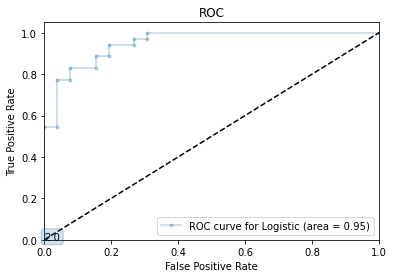

In [18]:
logit = sk.linear_model.LogisticRegression(solver='sag', max_iter=10, penalty='none')
logit.fit(X_train, y_train)

y_hat_test = logit.predict(X_test)
initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)


print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Logistic", logit, y_test, X_test, ax=None, labe=20, proba=True, skip=1);


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

our initial logistic regression model yielded accuracy score of: 0.8688524590163934
our logistic regression model yielded precision score of:  0.9354838709677419
our logistic regression model yielded F1 score of:  0.8787878787878788
our logistic regression model yielded recall score of:  0.8285714285714286


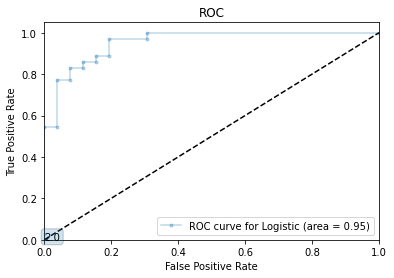

In [19]:
logit = sk.linear_model.LogisticRegression(solver='sag', max_iter=100, penalty='none')
#we can increase the maximum number of iterations, so that the solver has a higher chance of converging
logit.fit(X_train, y_train)

y_hat_test = logit.predict(X_test)
initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)


print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Logistic", logit, y_test, X_test, ax=None, labe=20, proba=True, skip=1);


### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

All I had to change was the max_iter from 10 to the default value of 100. This is the maximum number of iterations it takes for the solvers to converge on a value. This may have harmed the result because it allows our logistic regression to run for more iterations on the solver. Other parameters set would be the solver type to 'sag'. The default setting is 'lbfgs', so changing the algorithm is sure to impact the number of iterations.
As well, I changed the penalty to none, which means that no regularization is applied. This means our result will be a little more "bumpy," likely providing a slightly less "smooth" curve.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

our initial logistic regression model yielded accuracy score of: 0.8524590163934426
our logistic regression model yielded precision score of:  0.9333333333333333
our logistic regression model yielded F1 score of:  0.8615384615384616
our logistic regression model yielded recall score of:  0.8


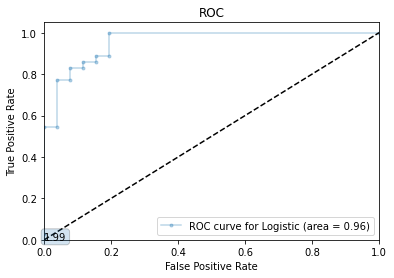

In [20]:
logit = sk.linear_model.LogisticRegression(solver='liblinear', penalty='l1')
#we can increase the maximum number of iterations, so that the solver has a higher chance of converging
logit.fit(X_train, y_train)

y_hat_test = logit.predict(X_test)
initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)


print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Logistic", logit, y_test, X_test, ax=None, labe=20, proba=True, skip=1);

### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

The liblinear solver uses a coordinate descent (CD) algorithm. It is able to solve optimization problems through the performance of approximate minimzation along coordinate directions or hyperplanes.
The SAG solver optimizes the sum of smooth convex functions. The cost per iteration does not depend on the number of terms in the sum. It also has memory; it converges quickly by storing previous gradient values. It is usually faster for very large datasets with lots of features. It only supports L2 penalties.
The liblinear likely produces the optimal outcome because our dataset is not that large, and thus SAG's reliance on previous values is unlikely to help it. Liblinear is more suited for this application purpose.

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

The penalty terms are important to regularize the logistic regression, which is helpful to avoid overfitting. Penalty terms help to shift the estimates towards zero, making the resulting models 'smoother'. The penalty term decides which method of regularization we do: L1 is Lasso Regression and L2 is Ridge Regression. L1 regression works by removing a feature through shrinking the less important feature's coefficient to zero. It adds an absoulte value of the magnitude of coefficients to the loss function. Basically, it puts a limit on the size of coefficients. This is good for a large number of features, where we will eliminate some that are not very helpful. 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [21]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler(),), ('svc', SVC(probability=True))])
y_hat_test = svm.predict(X_test)



### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

[[23  3]
 [ 6 29]]
our initial logistic regression model yielded accuracy score of: 0.8032786885245902
our logistic regression model yielded precision score of:  0.896551724137931
our logistic regression model yielded F1 score of:  0.8125
our logistic regression model yielded recall score of:  0.7428571428571429


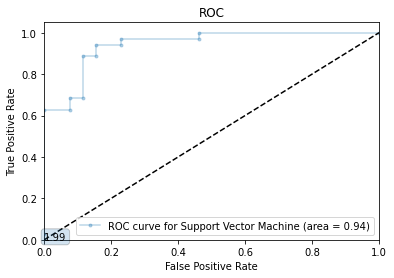

In [22]:
from sklearn.metrics import confusion_matrix

def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred


initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)

print(confusion_matrix(y_test, t_repredict(svm,0.5,X_test)))

print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Support Vector Machine", svm, y_test, X_test, ax=None, labe=20, proba=True, skip=1);

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [23]:
svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler(),), ('svc', SVC(probability=True))])
y_hat_test = svm.predict(X_test)

initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)

print(confusion_matrix(y_test, t_repredict(svm,0.5,X_test)))
draw_confusion_matrix(y, y_hat_test, heart_scaled)

print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Support Vector Machine", svm, y_test, X_test, ax=None, labe=20, proba=True, skip=1);

[[24  2]
 [ 7 28]]


ValueError: Found input variables with inconsistent numbers of samples: [303, 61]

<Figure size 432x288 with 0 Axes>

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The kernel function is the function that measures the similarity of our model and results in R^j without explicitly transforming the data. There are different kernel functionas that can be used to perform this measurement. We changed the kernel type from the default radial basis function kernel, which works with exponentials, to the linear kernel type. A non-linear hyperplane is a curved plane, while a linear hyperplane is "flat" like a piece of paper. The linear hyperplane performed better (higher accuracy, precision, F1, and recall scores) because our data is better suited to a linear hypeplane. Our classes are mostly linear, thus a linear place works well.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression uses a logistic function to create the decision boundary. It will result in a curved decision boundary. SVM is based on creating a line/plane and making sure it divides our values well by measuring the distance from the closest points to the boundary. It is a careful balance between margins and error. 

The difference here is if our SVM ends up being a "curve," it is because it is calculated using transformations to higher dimensions in order to get a model that more closely follows the data. Logistic regression always remains in 2 dimensions for the creation of the curve. SVM is based on a more geometric approach (less to do with the actual values and more to do with their positions in different dimensions) while logistic regression is more of a statistical approach.

## Baysian (Statistical) Classification

In class we learned about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result, along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_hat_test = gnb.predict(X_test)

initial_score = metrics.accuracy_score(y_test, y_hat_test)
prec_score = metrics.precision_score(y_test, y_hat_test)
f1_score = metrics.f1_score(y_test, y_hat_test)
recall_score = metrics.recall_score(y_test, y_hat_test)



print("Number of mislabeled points out of a total %d points: %d"
      % (X_test.shape[0], (y_test != y_hat_test).sum()))

print(confusion_matrix(y_test, t_repredict(svm,0.5,X_test)))
print("our initial logistic regression model yielded accuracy score of:", initial_score)
print("our logistic regression model yielded precision score of: ", prec_score)
print("our logistic regression model yielded F1 score of: ", f1_score)
print("our logistic regression model yielded recall score of: ", recall_score)

make_roc("Support Vector Machine", svm, y_test, X_test, ax=None, labe=20, proba=True, skip=1);

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

Here we are assuming that the Bayes Theorem holds. That is, we are assuming that the probabilyt of A given B is the same as the probability of B given A times the probability of A, all divided by the probability of B. We are also assuming that our values are sampled from a gaussian distribution, since we are using the Gaussian Naive Bayes classifier. We are also assuming that our predictors are indpendent. 

Since we assume predictors to be independent, we are taking a gamble that makes our results less accurate than the SVM or logistic models. Predictors in the real world are often dependent, causing issues for Naive Bayes Classifiers.

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

logit = sk.linear_model.LogisticRegression(solver='liblinear', penalty='l1')
X = x
accscores1 = []
accscores2 = []
precscores1 = []
precscores2 = []
f1scores1 = []
f1scores2 = []

kf = KFold(n_splits = 10)

for train, test in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train], x.iloc[test], y[train], y[test]
    model = logit.fit(X_train, y_train)
    predict = logit.predict(X_test)
    accscores1.append(metrics.accuracy_score(y_test, predict))
    f1scores1.append(metrics.f1_score(y_test, predict))
    precscores1.append(metrics.precision_score(y_test, predict))
    
    
svm = SVC(probability=True, kernel='linear')


scores2 = []
for train, test in kf.split(x):
    X_train, X_test, y_train, y_test = x.iloc[train], x.iloc[test], y[train], y[test]
    model = svm.fit(X_train, y_train)
    Pipeline(steps=[('standardscaler', StandardScaler(),), ('svc', SVC(probability=True))])
    predict = svm.predict(X_test)
    accscores2.append(metrics.accuracy_score(y_test, predict))
    f1scores2.append(metrics.f1_score(y_test, predict))
    precscores2.append(metrics.precision_score(y_test, predict))
    

print("The average accuracy for logistic was: ", np.mean(accscores1), "\n\n", 
      "The average accuracy for SVM was: ", np.mean(accscores2))

print("\nThe average precision for logistic was: ", np.mean(precscores1), "\n\n", 
      "\nThe average precision for SVM was: ", np.mean(precscores2))

print("\nThe average F1 for logistic was: ", np.mean(f1scores1), "\n\n", 
      "\nThe average F1 for SVM was: ", np.mean(f1scores2))




I selected the logistic model with liblinear and l1 penatly and the SVM with linear kernel to perform my K-fold cross validation tests on. The best performing model was the SVM, coming in with an average accuracy score of 0.821 in my initial testing. This performance is solid across all of the folds, telling us that our model was not just the result of random sampling on the train-test-split but rather a sound classification method. Precision and F1 unfortunately do not seem to be the strong suit for either of the best-performing models, but that is to be expected. It seems like it is difficult to be both accurate and precise when k-fold cross validation is being used.